In [1]:
import ScraperFC as sfc
import traceback
from data_viz_helpers import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
scraper = sfc.WhoScored()
try:
    match_data = scraper.scrape_match(
        'https://www.whoscored.com/Matches/1485202/Live/England-Premier-League-2020-2021-Southampton-Tottenham'
    )
except:
    traceback.print_exc()
scraper.close()

So we've scraped the Opta match data, now we need to find Harry Kane's player ID to identify his events.

In [3]:
match_data['matchCentreData']['playerIdNameDictionary']

{'87182': 'Jannik Vestergaard',
 '13798': 'Shane Long',
 '351355': 'Michael Obafemi',
 '363676': 'Moussa Djenepo',
 '136742': 'Jan Bednarek',
 '90780': 'Oriol Romeu',
 '91762': 'Danny Ings',
 '92550': 'Jack Stephens',
 '22846': 'Ryan Bertrand',
 '29796': 'Fraser Forster',
 '38577': 'Alex McCarthy',
 '105172': 'James Ward-Prowse',
 '313672': 'Kyle Walker-Peters',
 '386857': 'Jake Vokins',
 '390036': 'William Smallbone',
 '256419': 'Che Adams',
 '93677': 'Stuart Armstrong',
 '395472': 'Nathan Tella',
 '75830': 'Erik Lamela',
 '303908': 'Giovani Lo Celso',
 '69933': 'Toby Alderweireld',
 '92508': 'Lucas Moura',
 '322655': 'Davinson Sánchez',
 '101859': 'Pierre-Emile Højbjerg',
 '321389': 'Tanguy Ndombele',
 '25604': 'Hugo Lloris',
 '29595': 'Moussa Sissoko',
 '94042': 'Matt Doherty',
 '279425': 'Steven Bergwijn',
 '117973': 'Eric Dier',
 '143990': 'Harry Winks',
 '8786': 'Joe Hart',
 '83532': 'Harry Kane',
 '103837': 'Ben Davies',
 '83683': 'Serge Aurier',
 '91909': 'Son Heung-Min'}

We see that Harry Kane's Opta player ID is 83532. Now we need to find all of his events and get their x-y locations.

In [4]:
player_id = 83532
event_locations = list()

for event in match_data['matchCentreData']['events']:
    if 'playerId' not in event.keys():
        continue
    elif event['playerId'] == player_id:
        event_locations.append([event['x'], event['y']])

event_locations = np.array(event_locations)
event_locations.shape

(37, 2)

Now we can plot these events on the pitch and generate a heatmap of them.

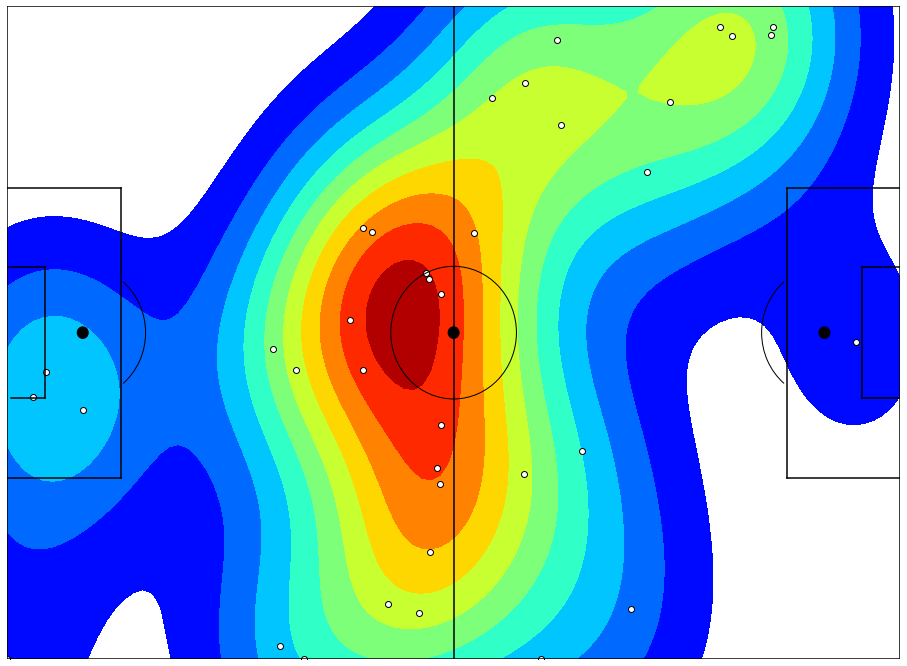

In [5]:
fig, ax = plt.subplots(figsize=[16,12])

# Plot the field
ax = plot_field(ax)

# Scale the Opta data to the range [0,130] and [0,90]
# for x and y respectively
x = event_locations[:,0] / 100 * 130
y = event_locations[:,1] / 100 * 90

# plot the heatmap
ax = sns.kdeplot(x, y, clip=[[0,130], [0,90]], shade=True, shade_lowest=False, cmap='jet')

# plot the events
ax.scatter(x, y, color='white', edgecolor='black')

plt.show()

Now let's do the same for Son Heung-Min, whose player ID is 91909

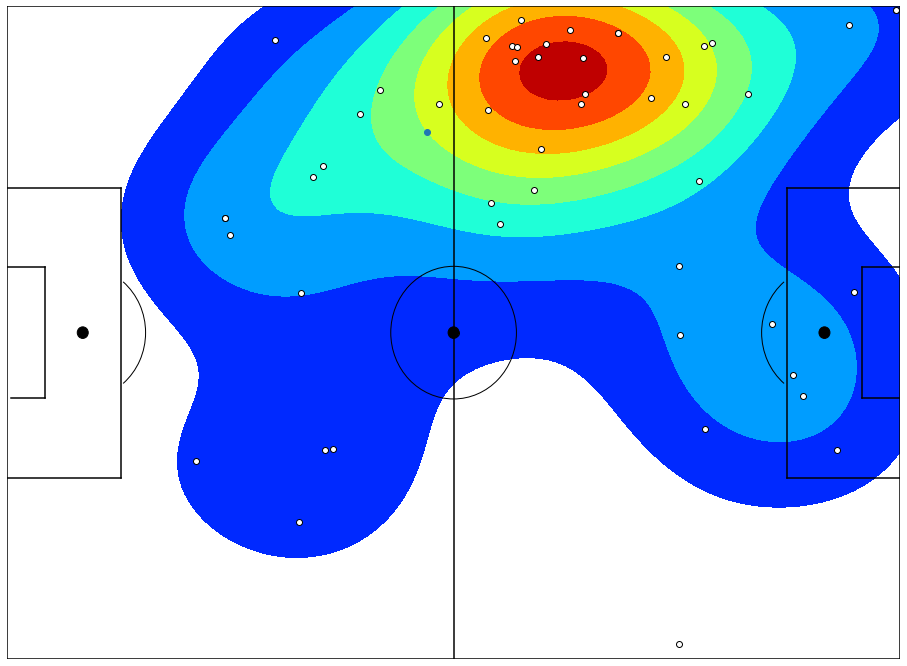

In [8]:
player_id = 91909
event_locations = list()

# gather the player's events
for event in match_data['matchCentreData']['events']:
    if 'playerId' not in event.keys():
        continue
    elif event['playerId'] == player_id:
        event_locations.append([event['x'], event['y']])

event_locations = np.array(event_locations)

# Make the plot
fig, ax = plt.subplots(figsize=[16,12])

# Plot the field
ax = plot_field(ax)

# Scale the Opta data to the range [0,130] 
# and [0,90] for x and y respectively
x = event_locations[:,0] / 100 * 130
y = event_locations[:,1] / 100 * 90

# plot the heatmap
ax = sns.kdeplot(x, y, clip=[[0,130], [0,90]], shade=True, shade_lowest=False, cmap='jet')

# plot the events
ax.scatter(x, y, color='white', edgecolor='black')

plt.show()